Лекция 5 PySpark домашнее задание

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz

In [3]:
!tar -xvf spark-2.4.5-bin-hadoop2.7.tgz

spark-2.4.5-bin-hadoop2.7/
spark-2.4.5-bin-hadoop2.7/licenses/
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-jtransforms.html
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd-jni.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-xmlenc.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-vis.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-spire.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-sorttable.js.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-slf4j.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-scopt.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-scala.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-sbt-launch-lib.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-respond.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-reflectasm.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-pyrolite.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-py4j.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-protobuf.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-pmml-model

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
dftn_orig = spark.read.csv('train.csv', inferSchema=True, header=True)
dftt_orig = spark.read.csv('test.csv', inferSchema=True, header=True)


In [89]:
dftn_orig.describe().show()
#в категории Cabin 70% пустых значений и вряд ли содержит полезные данные - удалить столбец.
#в категории Age 177 пустых значений (в строке count). Скорее эти данные могут влиять на результат, поэтому очистим от нулевых данных

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                null|  null| 29.69911764705882|0.5230078563411896|0.38159371492704824|260318.54916792738| 32.20420

In [0]:
import pandas as pd
df = pd.read_csv('train.csv')

In [63]:
#df.isna().sum()
#df[df['Embarked'].isna()]
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
#удалим не нужные столбцы
dftn = dftn_orig.select('Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived')
#удалим все строки c пустыми или NaN значениями
dftn = dftn.na.drop()

In [0]:
dftt = dftt_orig.select('Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked').describe()
dftt = dftt.na.drop()

In [82]:
dftn.describe().show()

+-------+------------------+------+-----------------+------------------+-------------------+------------------+--------+------------------+
|summary|            Pclass|   Sex|              Age|             SibSp|              Parch|              Fare|Embarked|          Survived|
+-------+------------------+------+-----------------+------------------+-------------------+------------------+--------+------------------+
|  count|               712|   712|              712|               712|                712|               712|     712|               712|
|   mean| 2.240168539325843|  null|29.64209269662921|0.5140449438202247|0.43258426966292135| 34.56725140449432|    null|0.4044943820224719|
| stddev|0.8368543166903446|  null|14.49293290032352|0.9306921267673427| 0.8541814457454133|52.938648174710906|    null|0.4911389472541192|
|    min|                 1|female|             0.42|                 0|                  0|               0.0|       C|                 0|
|    max|           

In [91]:
dftn.show()

+------+------+----+-----+-----+-------+--------+--------+
|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|Survived|
+------+------+----+-----+-----+-------+--------+--------+
|     3|  male|22.0|    1|    0|   7.25|       S|       0|
|     1|female|38.0|    1|    0|71.2833|       C|       1|
|     3|female|26.0|    0|    0|  7.925|       S|       1|
|     1|female|35.0|    1|    0|   53.1|       S|       1|
|     3|  male|35.0|    0|    0|   8.05|       S|       0|
|     1|  male|54.0|    0|    0|51.8625|       S|       0|
|     3|  male| 2.0|    3|    1| 21.075|       S|       0|
|     3|female|27.0|    0|    2|11.1333|       S|       1|
|     2|female|14.0|    1|    0|30.0708|       C|       1|
|     3|female| 4.0|    1|    1|   16.7|       S|       1|
|     1|female|58.0|    0|    0|  26.55|       S|       1|
|     3|  male|20.0|    0|    0|   8.05|       S|       0|
|     3|  male|39.0|    1|    5| 31.275|       S|       0|
|     3|female|14.0|    0|    0| 7.8542|       S|       

In [104]:
dftt.describe().show()

+-------+-------+------------------+-----+------------------+------------------+------------------+-----------------+--------+
|summary|summary|            Pclass|  Sex|               Age|             SibSp|             Parch|             Fare|Embarked|
+-------+-------+------------------+-----+------------------+------------------+------------------+-----------------+--------+
|  count|      3|                 3|    3|                 3|                 3|                 3|                3|       3|
|   mean|   null|140.66666666666666|418.0|136.05666666666667|             142.0|142.33333333333334|         309.7764|   418.0|
| stddev|   null| 240.1797937656982|  NaN| 173.8760755058997|239.05647868233984|238.77674370284333|272.4756458674426|     NaN|
|    min|  count|                 1|  418|              0.17|                 0|                 0|              0.0|     418|
|    max|    min|               418| male|              76.0|                 8|                 9|         512

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator, VectorAssembler

In [92]:
#Данные не очень хорошо сбалансированы
dftn.groupby('Survived').count().show()
#проверим типы данных
dftn.printSchema()

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  288|
|       0|  424|
+--------+-----+

root
 |-- Pclass: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- Survived: integer (nullable = true)



In [0]:
stages = []
#['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
catColumn = ['Sex','Embarked']
for catCol in catColumn:
    stringIndexer = StringIndexer(inputCol = catCol, outputCol = catCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[catCol + "classVec"])
    stages += [stringIndexer, encoder]

label_stringIdx = StringIndexer(inputCol = 'Survived', outputCol = 'label')
stages += [label_stringIdx]
numColumn = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
assemblerInputs = [c + "classVec" for c in catColumn] + numColumn
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [107]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(dftn)
dftn_pm = pipelineModel.transform(dftn)
selectedCols = ['label', 'features'] + dftn.columns
dftn_pm = dftn_pm.select(selectedCols)
dftn_pm.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- Survived: integer (nullable = true)



In [0]:

train, test = dftn_pm.randomSplit([0.9, 0.1])

In [110]:
#для наглядности и проверки как генерируется feature и label (survived - бинарная категория выживших)
pd.DataFrame(dftn_pm.take(5), columns=dftn_pm.columns).transpose()

,0,1,2,3,4
label,0,1,1,1,0
features,"[1.0, 1.0, 0.0, 3.0, 22.0, 1.0, 0.0, 7.25]","[0.0, 0.0, 1.0, 1.0, 38.0, 1.0, 0.0, 71.2833]","(0.0, 1.0, 0.0, 3.0, 26.0, 0.0, 0.0, 7.925)","[0.0, 1.0, 0.0, 1.0, 35.0, 1.0, 0.0, 53.1]","[1.0, 1.0, 0.0, 3.0, 35.0, 0.0, 0.0, 8.05]"
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,S,C,S,S,S
Survived,0,1,1,1,0


In [0]:
#тренируем модель на тренировочных данных
LR = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=15)
LR_model = LR.fit(train)

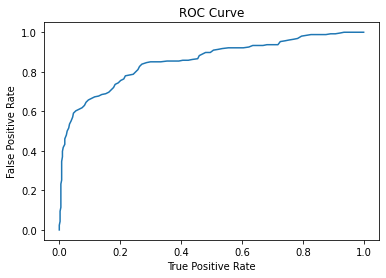

Training set areaUnderROC: 0.8556277848989811


In [123]:
import matplotlib.pyplot as plt
trainingSummary = LR_model.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [126]:
#на основе етстовых данных с помощью модели делаем предсказание
predictions = LR_model.transform(test)
predictions.select('Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'label', 'rawPrediction', 'prediction', 'probability').show(20)

+------+------+----+-----+-----+--------+--------+-----+--------------------+----------+--------------------+
|Pclass|   Sex| Age|SibSp|Parch|    Fare|Embarked|label|       rawPrediction|prediction|         probability|
+------+------+----+-----+-----+--------+--------+-----+--------------------+----------+--------------------+
|     3|  male|49.0|    0|    0|     0.0|       S|  0.0|[2.59286842269737...|       0.0|[0.93040119077492...|
|     3|  male|19.0|    0|    0|    6.75|       Q|  0.0|[3.38739925233786...|       0.0|[0.96730840149864...|
|     3|  male|21.0|    0|    0|  7.7333|       Q|  0.0|[3.43384209136269...|       0.0|[0.96874560662811...|
|     3|female|30.0|    0|    0|  8.6625|       S|  0.0|[-0.4734603585578...|       1.0|[0.38379755084157...|
|     3|female| 9.0|    1|    1| 15.2458|       C|  0.0|[-1.1069127668017...|       1.0|[0.24844689215152...|
|     3|female| 9.0|    4|    2|  31.275|       S|  0.0|[-0.2144345330184...|       1.0|[0.44659584665646...|
|     1|  

In [120]:
predictions.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0|   44|
|  1.0|   27|
+-----+-----+



In [129]:
#Рассчитаем точность модели. 74% - слабовато.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.7437187641980917
